In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [12]:
(X_train,Y_train),(X_test,Y_test)=datasets.cifar10.load_data()

In [13]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
X_test.shape

(10000, 32, 32, 3)

In [16]:
Y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [19]:
Y_train=Y_train.reshape(-1,)
Y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [20]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [34]:
def plot_sample(X,Y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

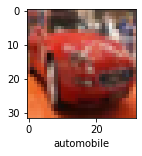

In [38]:
plot_sample(X_train,Y_train, 5)

### Normalizing the training set

In [39]:
X_train=X_train/255
X_test=X_test/255

In [42]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

## convolutional neural network to train our images

In [46]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [47]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [52]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.0963 - accuracy: 0.9651
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0880 - accuracy: 0.9684
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0919 - accuracy: 0.9686
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0873 - accuracy: 0.9699
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0821 - accuracy: 0.9715
Epoch 6/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.0832 - accuracy: 0.9716
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0866 - accuracy: 0.9702
Epoch 8/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0895 - accuracy: 0.9694
Epoch 9/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0711 - accuracy: 0.9764
Epoch 10/10
1563/1563 [==============================] - 25s 16m

In [53]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 3.3465 - accuracy: 0.6684


[3.3465137481689453, 0.66839998960495]

In [54]:
y_pred=cnn.predict(X_test)

In [55]:
y_pred[:5]

array([[2.3252902e-16, 4.0253553e-21, 5.5021609e-19, 1.0000000e+00,
        2.2694329e-16, 3.9802779e-11, 8.8136309e-16, 8.4590996e-22,
        2.3492373e-13, 1.3993235e-19],
       [3.3794815e-18, 3.2149887e-11, 5.6415837e-35, 1.4640220e-30,
        0.0000000e+00, 1.0049430e-33, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 4.0865457e-14],
       [6.1343606e-03, 9.6277779e-01, 1.4360388e-06, 1.1152711e-07,
        1.7582261e-05, 2.1036708e-07, 2.5908395e-10, 1.7093552e-02,
        1.3974596e-02, 2.4548126e-07],
       [9.9999583e-01, 1.7617001e-24, 4.2231400e-06, 5.6271784e-21,
        2.4068949e-15, 1.4130742e-30, 5.8906372e-16, 5.5581655e-35,
        7.3566251e-15, 1.7732789e-29],
       [1.8646801e-30, 6.1031830e-18, 3.8242055e-05, 7.5112716e-06,
        9.7831625e-01, 9.2041902e-11, 2.1638034e-02, 4.1938096e-23,
        1.2241372e-24, 3.5305971e-24]], dtype=float32)

In [56]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [59]:
Y_test=Y_test.reshape(-1,)
Y_test[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

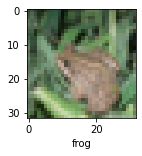

In [63]:
plot_sample(X_test,Y_test, 4)